In [1]:
import cv2
import scipy
import matplotlib.pyplot as plt
from IPython.display import Image, display
!wget 'https://github.com/Henry-Medeiros/images/raw/master/Marquette.jpg'
img = cv2.imread('Marquette.jpg')
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

--2020-12-02 18:08:24--  https://github.com/Henry-Medeiros/images/raw/master/Marquette.jpg
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Henry-Medeiros/images/master/Marquette.jpg [following]
--2020-12-02 18:08:25--  https://raw.githubusercontent.com/Henry-Medeiros/images/master/Marquette.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 482326 (471K) [image/jpeg]
Saving to: ‘Marquette.jpg’

Marquette.jpg       100%[===================>] 471.02K  --.-KB/s    in 0.04s   

2020-12-02 18:08:25 (10.5 MB/s) - ‘Marquette.jpg’ saved [482326/482326]



In [ ]:
import cv2
import numpy as np
# 2D array is converted to a 1D array.
fl = img1.flatten()
# Histogram and the bins of the image are computed.
hist,bins = np.histogram(img1,256,[0,255])
# cumulative distribution function is computed
cdf = hist.cumsum()
# Places where cdf=0 is masked or ignored and
# rest is stored in cdf_m.
cdf_m = np.ma.masked_equal(cdf,0)
# Histogram equalization is performed.
num_cdf_m = (cdf_m - cdf_m.min())*255
den_cdf_m = (cdf_m.max()-cdf_m.min())
cdf_m = num_cdf_m/den_cdf_m
# The masked places in cdf_m are now 0.
cdf = np.ma.filled(cdf_m,0).astype('uint8')
# cdf values are assigned in the flattened array.
im2 = cdf[fl]
# im2 is 1D so we use reshape command to.
# make it into 2D.
im3 = np.reshape(im2,img1.shape)


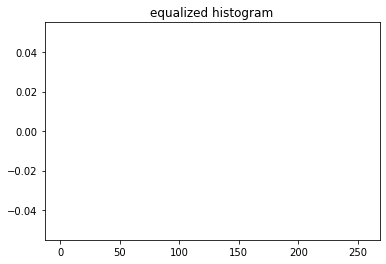

In [ ]:
# Histogram
import numpy as np
L = 256
r_k = np.arange(L)
n_k = np.zeros(L)
r_k_vals = np.array([10,19,20,30,40,50,60,70])
n_k_vals= 1/(64*64)


s_k = np.zeros(L)

for val in r_k:
  s_k[val]=np.sum(n_k[:val+1])


plt.bar(r_k,s_k)
plt.title('equalized histogram')
plt.show()

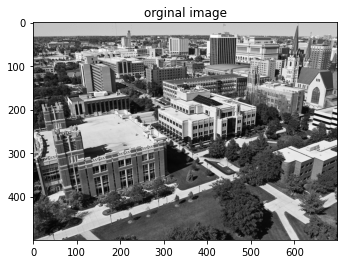

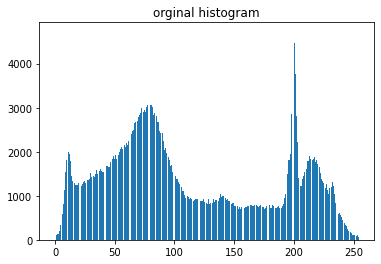

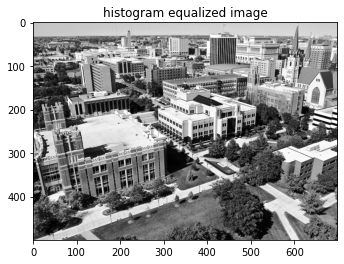

In [4]:
import numpy as np
img = cv2.imread('Marquette.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_hist = cv2.equalizeHist(img)
plt.imshow(img,'gray')
plt.title('orginal image')
plt.show()

org_hist, org_bins = np.histogram(img.ravel(),256,[0,255])
plt.bar(org_bins[:-1],org_hist)
plt.title('orginal histogram')
plt.show()

plt.imshow(img_hist,'gray')
plt.title('histogram equalized image')
plt.show()

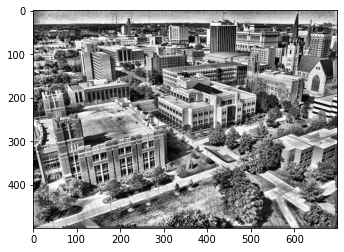

In [ ]:
from skimage.exposure import equalize_adapthist
ad_hist_img = equalize_adapthist(img,clip_limit=0.2)
plt.imshow(ad_hist_img,'gray')

--2020-09-28 21:21:04--  https://github.com/Henry-Medeiros/images/raw/master/Marquette_gray3.jpg
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Henry-Medeiros/images/master/Marquette_gray3.jpg [following]
--2020-09-28 21:21:04--  https://raw.githubusercontent.com/Henry-Medeiros/images/master/Marquette_gray3.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 147678 (144K) [image/jpeg]
Saving to: ‘Marquette_gray3.jpg.1’

Marquette_gray3.jpg 100%[===================>] 144.22K  --.-KB/s    in 0.02s   

2020-09-28 21:21:04 (5.66 MB/s) - ‘Marquette_gray3.jpg.1’ saved [147678/147678]



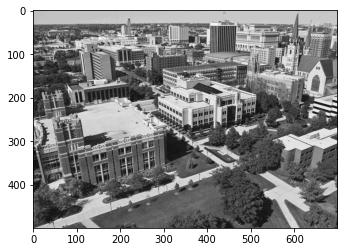

In [ ]:
!wget 'https://github.com/Henry-Medeiros/images/raw/master/Marquette_gray3.jpg'
img = cv2.imread('Marquette_gray3.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img,'gray')



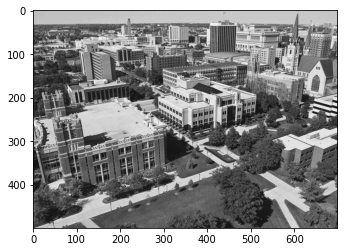

In [ ]:
img = img.astype('float')
new_img = 255.0*(img-img.min())/(img.max()-img.min()+0.0000001)

plt.imshow(new_img,'gray')

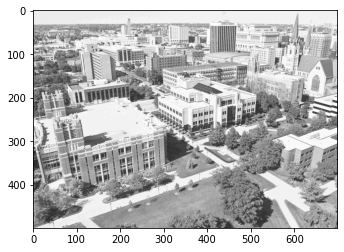

In [ ]:
# Sigmoid Correction:
from skimage.exposure import adjust_sigmoid
img = cv2.imread('Marquette_gray3.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_s = adjust_sigmoid(img, cutoff= 0.3, gain= 15.0)
plt.imshow(img_s,'gray')